# Clustering based on Location
From MapBox: The data for each country is normalized within that country. Comparisons made over short timescales and short distances are more trustworthy than those made over long timescales and distances. Comparisons made over areas that have a high average activity are more trustworthy than those made over areas that have low average activity.

K-Means Clustering Method shown below

## Imports and Setup

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import DBSCAN, KMeans

## Load Data

In [7]:
# Loading BWA school geojson data, can replace in future with other AOIs we may have data for
sample_df = gpd.read_file('/Users/kelseydoerksen/Desktop/Giga/SchoolMapping/BWA/BWA_train.geojson')

## K-Means Clustering

In [10]:
# Get coordinates of school, non-school samples
coords = []
for i in range(len(sample_df)):
    coords.append([sample_df.loc[i].geometry.x, sample_df.loc[i].geometry.y])

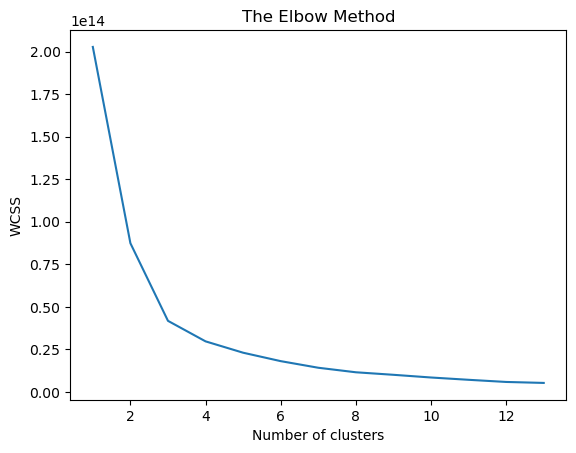

In [11]:
# Using elbow method to determine number of clusters to be used
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 14), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
def add_cluster_id(df, coordinates, num_clusters):
    """
    Inspect the elbow method plot, set the number of clusters to group
    the dataset by and add the cluster id to the dataframe
    :param: df: dataframe to add cluster id to
    :param: coordinates: coordinates of samples to cluster by
    :param: num_clusters: number of clusters
    
    :return: df_with_cluster: datagrame with added cluster id
    """
    kmeans = KMeans(n_clusters = num_clusters, init = 'k-means++', random_state = 5,  max_iter=400, n_init=10)
    y_kmeans = kmeans.fit_predict(coordinates)
    k=pd.DataFrame(y_kmeans, columns=['cluster'])
    
    # add cluster class to school dataframe
    df_with_cluster = df.join(k)
    
    return df_with_cluster

In [13]:
# Add cluster id to dataframe
sample_df_with_clusters = add_cluster_id(sample_df, coords, 4)

In [23]:
def plot_clustered_data(df_with_clusters):
    """
    Plot k-means clustered data
    :param: df_with_clusters: dataframe with cluster labels
    """
    cluster_ids = df_with_clusters['cluster'].unique()
    for c in range(len(cluster_ids)):
        filtered_df = df_with_clusters[df_with_clusters['cluster'] == c]
        plt.scatter(filtered_df.geometry.x, filtered_df.geometry.y, label='Cluster: {}'.format(c))
    
    plt.legend()
    plt.title('K-Means Clustered School and Non-School Samples')
    plt.xlabel('Longitude ESRI: 54009')
    plt.xlabel('Latitude ESRI: 54009')
    plt.show()

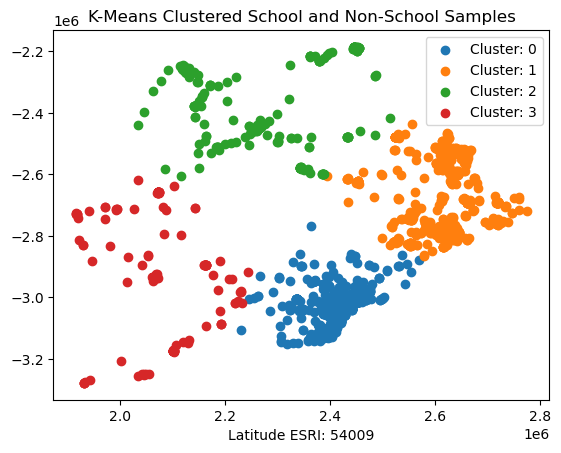

In [24]:
# Plot the clustered data to visualize
plot_clustered_data(sample_df_with_clusters)

In [ ]:
# Save the data with cluster ids
save_dir = ''
sample_df_with_clusters.to_csv('{}/BWA_train_KMean_clusters.csv')